## Problem with Sequential Model

Let say we have image data sets of human face 

so we have to predicts the age of persons and his emotion (like happy ,angry ,sad , etc)

we can't use suqential model to predict these two 

for that we use to train two model one for image and other for emotion But **its not the best way**

so for this we will use **functional model** 

![function](../images/function.png)

# Function Model

A Simple Example of function model 

for example we have data of person

where its given its salary , height, maritial status 

we have to predict age and its living city

so using keras function model

![kfunctional](../images/functional.png)

### Lets Design Functional Model

In [2]:
from keras.models import Model

In [7]:
model = Model(inputs= x, outputs = [output1,output2])

In [4]:
from keras.layers import *

In [5]:
## so we make first input layer how many have input 

x = Input(shape=(3,))

In [8]:
## Making layers

hidden1 = Dense(128,activation='relu')(x)
hidden2 = Dense(64,activation='relu')(hidden1)

## Not to split output layer

output1 = Dense(1,activation='linear')(hidden2) ## for age prediction
output2 = Dense(1,activation='sigmoid')(hidden2) ## for city prediction

In [9]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │        512 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,898 (34.76 KB)

 Trainable params: 8,898 (34.76 KB)

 Non-trainable params: 0 (0.00 B)

## **To visulize our Model using kers utils**

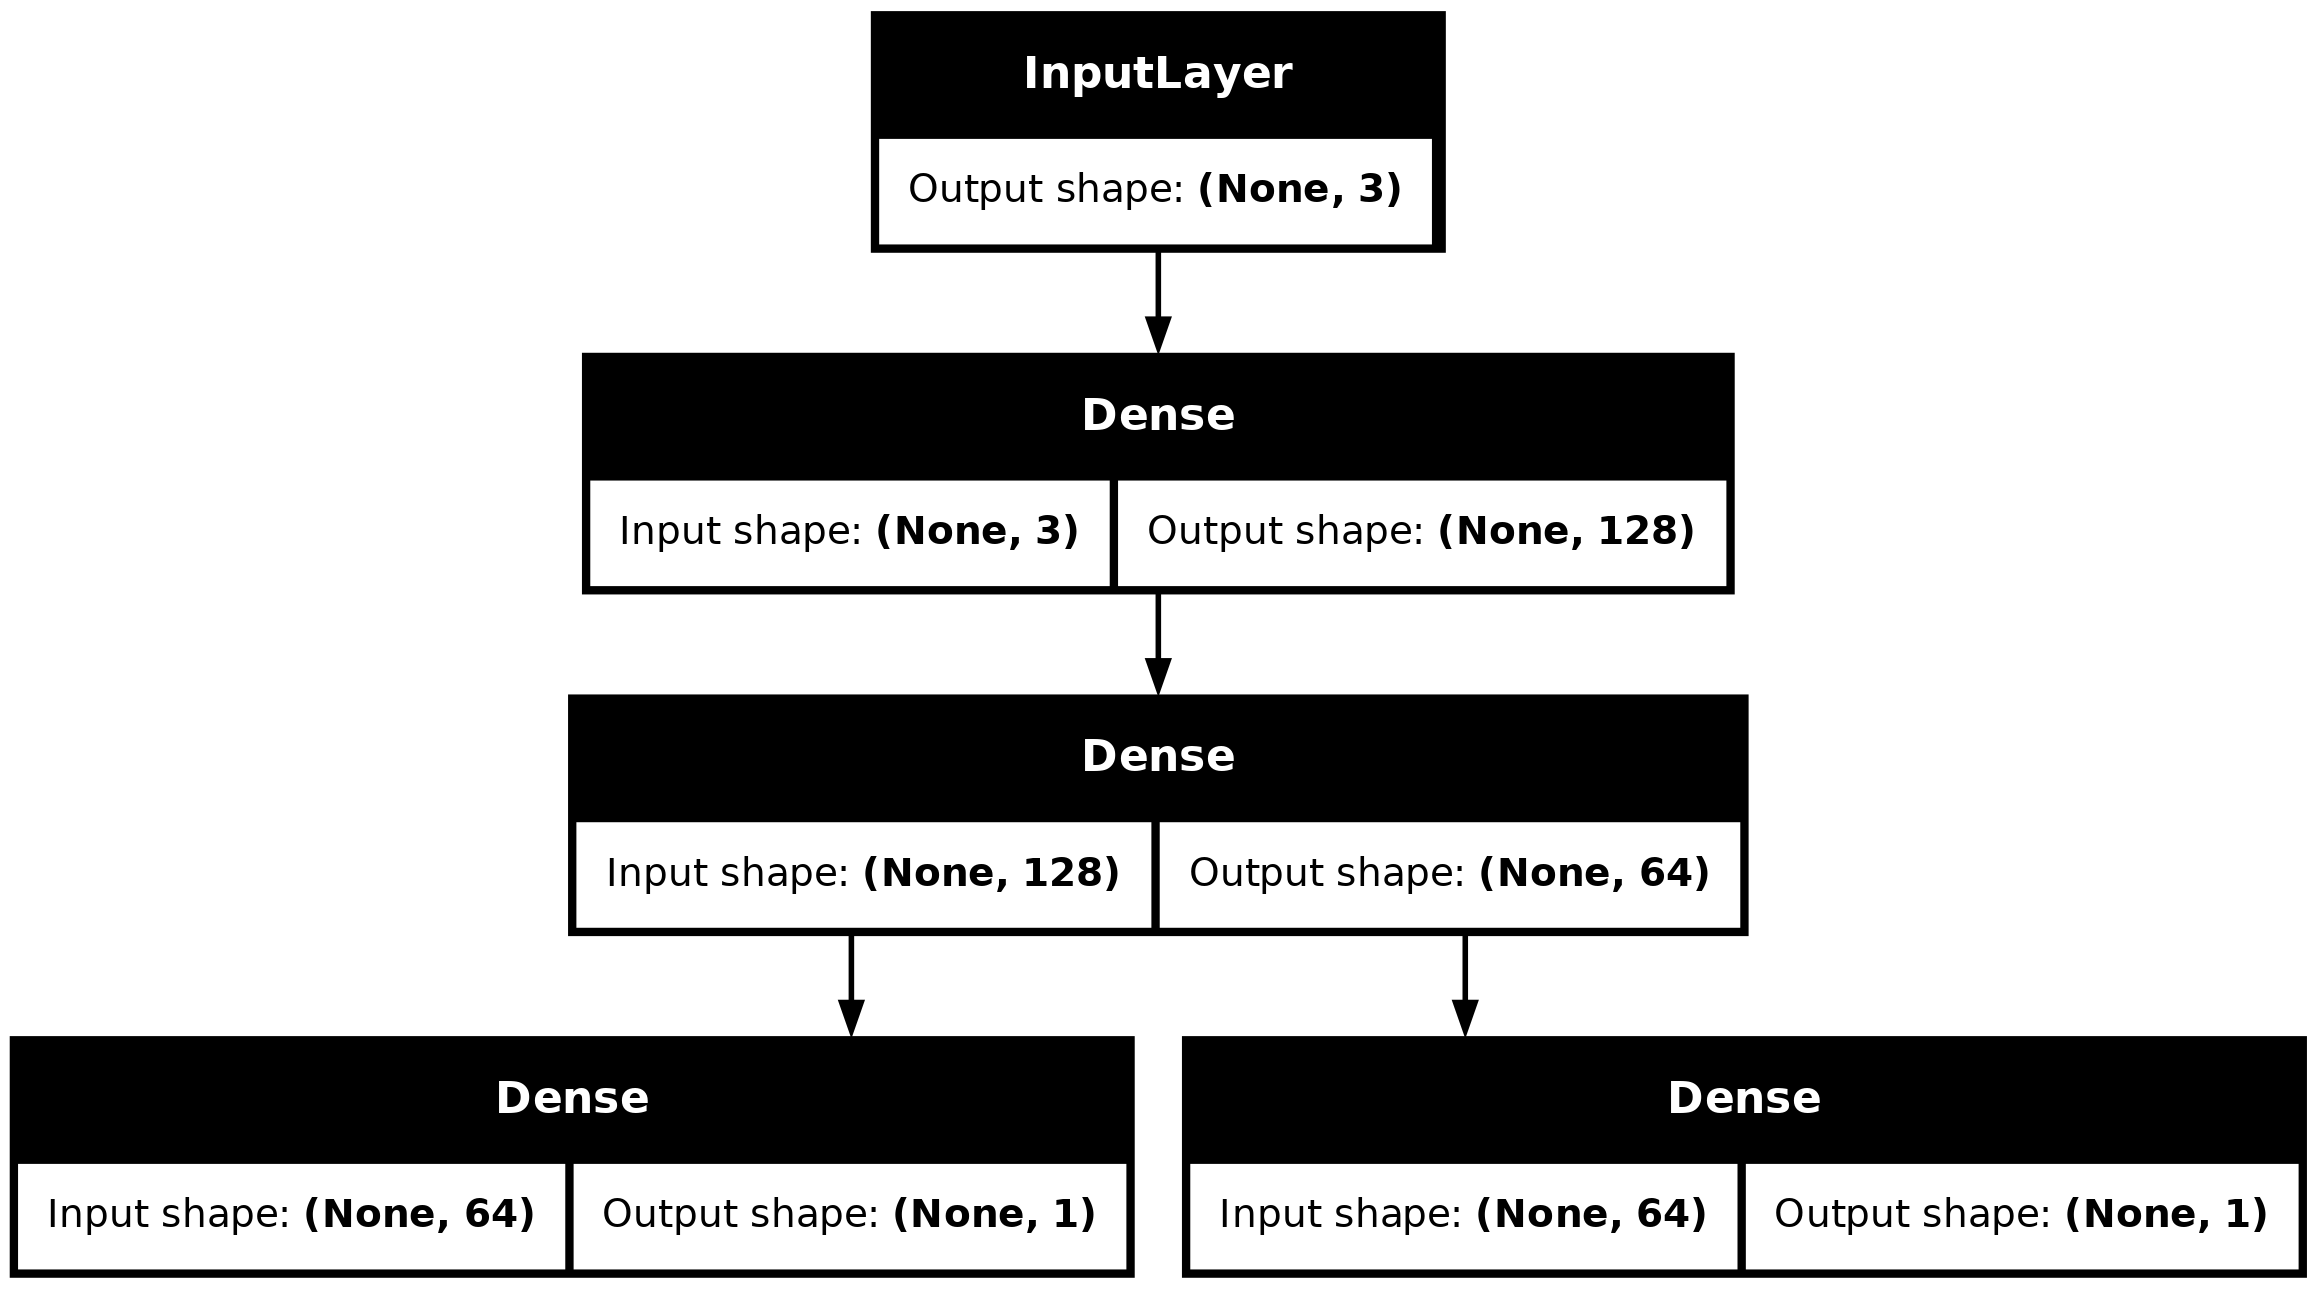

In [12]:
from keras.utils import plot_model

plot_model(model,show_shapes=True)

## **Multiple Inputs**

In [14]:
inputA = Input(shape=(32,))
inputB = Input(shape=(128,))

In [15]:
## The First Branch operates on the first input
x = Dense(8,activation='relu')(inputA)
x1 = Dense(4,activation='relu')(x)

In [17]:
## the second branch opreates on the second input

y = Dense(64,activation='relu')(inputB)
y1 =Dense(32,activation='relu')(y)
y2 =Dense(4,activation='relu')(y1)

In [19]:
## Combine both the branches

combined = concatenate([x1,y2])

In [20]:
## apply a Fc layer then a regression prdiction on the  combined outputs

z = Dense(2,activation='relu')(combined)
z1=Dense(1,activation='linear')(z)

In [21]:
## our model will accept the inputs of the two brances and then output a single value

model = Model(inputs=[inputA,inputB],outputs=z)

In [22]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 32)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 64)        │      8,256 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 8)         │        264 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 32)        │      2,080 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 4)         │         36 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 4)         │        132 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 8)         │          0 │ dense_9[0][0],    │
│ (Concatenate)       │                   │            │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 2)         │         18 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 10,786 (42.13 KB)

 Trainable params: 10,786 (42.13 KB)

 Non-trainable params: 0 (0.00 B)

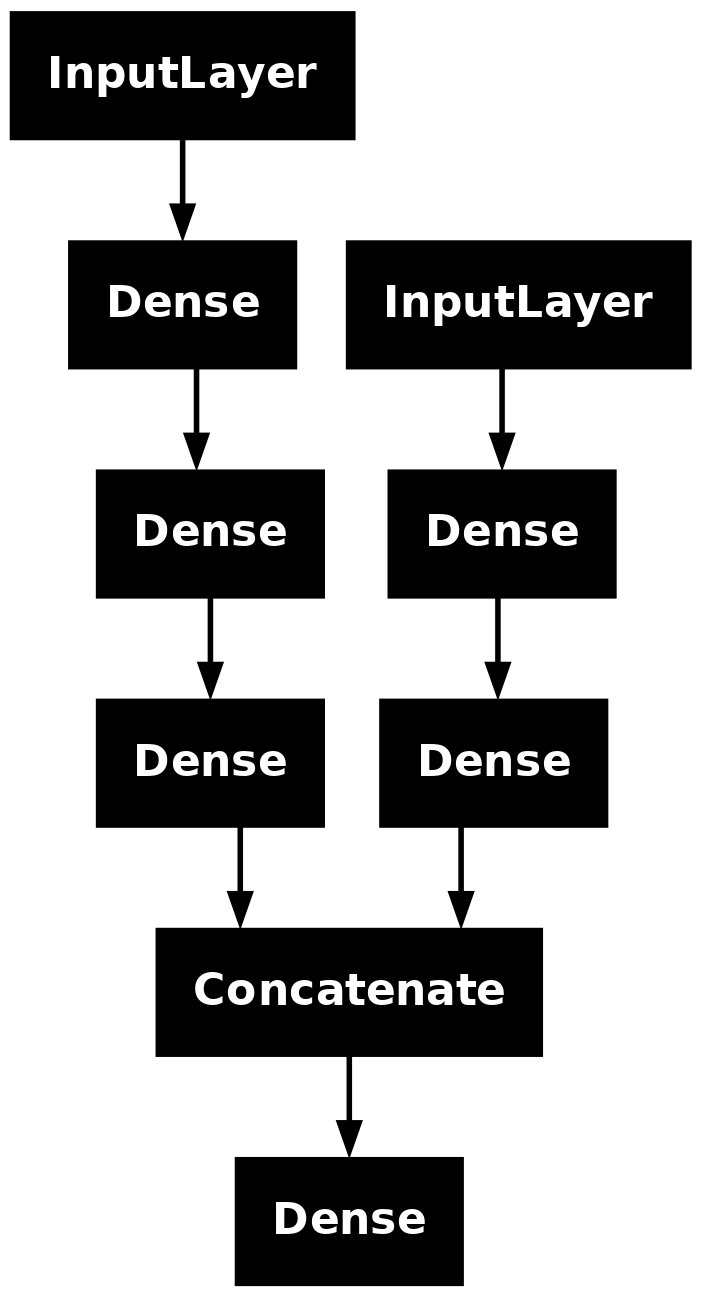

In [23]:
plot_model(model)